<h2> Preprocessing </h2>

In [16]:
import pandas as pd
import numpy as np

In [17]:
energy_met=pd.read_csv('energy_states_consolidated.csv')
max_demand=pd.read_csv('max_states_consolidated.csv')

print("Energy Met:")
print(energy_met.head())
print("Max Demand:")
print(max_demand.head())

Energy Met:
       Date  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
0  01-01-20   121.9    133.5      240.2   85.5  311.8         39.3  30.1   
1  02-01-20   118.8    128.2      239.8   83.5  320.7         38.1  30.1   
2  03-01-20   121.0    127.5      239.1   79.2  299.0         39.2  30.2   
3  04-01-20   121.4    132.6      240.4   76.6  286.8         39.2  31.0   
4  05-01-20   118.0    132.1      241.9   71.1  294.2         40.1  30.1   

   J&K(UT) & Ladakh(UT)  Chandigarh  ...  Odisha  West Bengal  Sikkim  \
0                  54.1         4.9  ...    67.9        110.2     1.9   
1                  53.2         4.8  ...    66.3        106.8     1.7   
2                  51.5         4.3  ...    65.8        107.0     2.0   
3                  53.2         4.3  ...    62.9        106.4     2.0   
4                  53.3         4.0  ...    64.0        109.3     1.5   

   Arunachal Pradesh  Assam  Manipur  Meghalaya  Mizoram  Nagaland  Tripura  
0             

<code>energy_met</code> contains state-wise energy met per day in MU (million units).

<code>max_demand</code> contains the daily maximum load demand state-wise in MW (megawatt).

In [18]:
#.info() to check data types and null counts
#.describe() gives summary statistics to understand the distribution

print("Energy Met:")
print(energy_met.info())
print(energy_met.describe())
print("====================================================")
print("Max Demand:")
print(max_demand.info())
print(max_demand.describe())


Energy Met:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1600 non-null   object 
 1   Punjab                1586 non-null   float64
 2   Haryana               1586 non-null   float64
 3   Rajasthan             1586 non-null   float64
 4   Delhi                 1586 non-null   float64
 5   UP                    1586 non-null   float64
 6   Uttarakhand           1586 non-null   float64
 7   HP                    1586 non-null   float64
 8   J&K(UT) & Ladakh(UT)  1585 non-null   float64
 9   Chandigarh            1586 non-null   float64
 10  Chhattisgarh          1585 non-null   float64
 11  Gujarat               1586 non-null   float64
 12  MP                    1586 non-null   float64
 13  Maharashtra           1586 non-null   float64
 14  Goa                   1586 non-null   float64
 15  Andhra Pr

In [19]:
print(max_demand['Date'].duplicated().sum())
print(energy_met['Date'].duplicated().sum())

0
0


In [20]:
# Convert the 'Date' column to datetime format
energy_met['Date'] = pd.to_datetime(energy_met['Date'],format='%d-%m-%y')
max_demand['Date'] = pd.to_datetime(max_demand['Date'],format='%d-%m-%y')

#Setting the Date column as the index
energy_met.set_index('Date', inplace=True)
max_demand.set_index('Date', inplace=True)

energy_met.sort_index(inplace=True)
max_demand.sort_index(inplace=True)

print(energy_met.head())
print(energy_met.tail())
print("================================================")
print(max_demand.head())
print(max_demand.tail())

            Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
Date                                                                      
2020-01-01   121.9    133.5      240.2   85.5  311.8         39.3  30.1   
2020-01-02   118.8    128.2      239.8   83.5  320.7         38.1  30.1   
2020-01-03   121.0    127.5      239.1   79.2  299.0         39.2  30.2   
2020-01-04   121.4    132.6      240.4   76.6  286.8         39.2  31.0   
2020-01-05   118.0    132.1      241.9   71.1  294.2         40.1  30.1   

            J&K(UT) & Ladakh(UT)  Chandigarh  Chhattisgarh  ...  Odisha  \
Date                                                        ...           
2020-01-01                  54.1         4.9          78.8  ...    67.9   
2020-01-02                  53.2         4.8          74.8  ...    66.3   
2020-01-03                  51.5         4.3          69.0  ...    65.8   
2020-01-04                  53.2         4.3          68.1  ...    62.9   
2020-01-05              

In [21]:
# Handle missing values (e.g., forward fill)
energy_met.fillna(method='ffill', inplace=True)
max_demand.fillna(method='ffill', inplace=True)

# Verify that there are no more missing values
print(energy_met.isnull().sum())
print("======================================")
print(max_demand.isnull().sum())

Punjab                  0
Haryana                 0
Rajasthan               0
Delhi                   0
UP                      0
Uttarakhand             0
HP                      0
J&K(UT) & Ladakh(UT)    0
Chandigarh              0
Chhattisgarh            0
Gujarat                 0
MP                      0
Maharashtra             0
Goa                     0
Andhra Pradesh          0
Telangana               0
Karnataka               0
Kerala                  0
Tamil Nadu              0
Puducherry              0
Bihar                   0
DVC                     0
Jharkhand               0
Odisha                  0
West Bengal             0
Sikkim                  0
Arunachal Pradesh       0
Assam                   0
Manipur                 0
Meghalaya               0
Mizoram                 0
Nagaland                0
Tripura                 0
dtype: int64
Punjab                  0
Haryana                 0
Rajasthan               0
Delhi                   0
UP                      0

/var/folders/x5/67k0hq3s7rq6zj38gkfh19m00000gn/T/ipykernel_31492/3760063947.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy_met.fillna(method='ffill', inplace=True)
/var/folders/x5/67k0hq3s7rq6zj38gkfh19m00000gn/T/ipykernel_31492/3760063947.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  max_demand.fillna(method='ffill', inplace=True)


In [22]:
for df in [energy_met,max_demand]:
  # Select numeric columns
  numeric_df = df.select_dtypes(include=[np.number])

  # Check if all columns are numeric
  all_numeric = numeric_df.shape[1] == df.shape[1]

  # Print the result
  print(f"All columns are numeric: {all_numeric}")

  # If not all columns are numeric, print the non-numeric columns
  if not all_numeric:
      non_numeric_columns = df.columns.difference(numeric_df.columns)
      print("Non-numeric columns:")
      print(non_numeric_columns)

  print("=================================================")

All columns are numeric: True
All columns are numeric: True


## Exploratory Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

**Dual-axis Line Plot:** Visualize both maximum demand and energy met over time for a specific state.

Can be seen that both Daily Maximum Demand and Energy Met follow similar trends

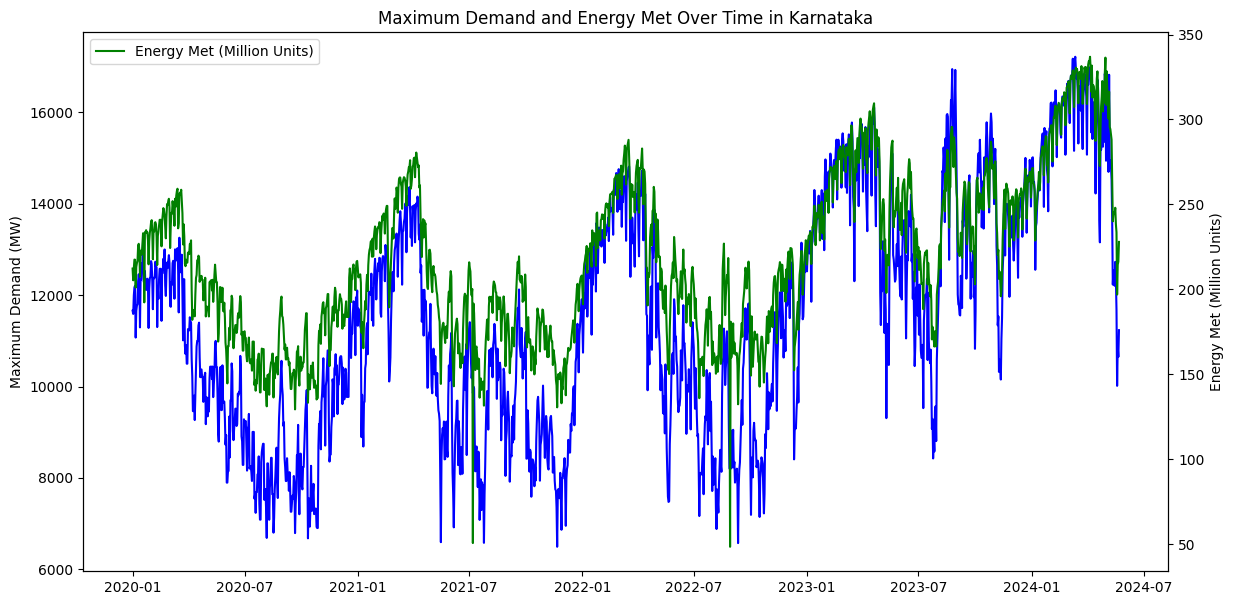

In [24]:
state = 'Karnataka'

plt.figure(figsize=(14, 7))
plt.plot(max_demand.index, max_demand[state], label='Maximum Demand (MW)', color='blue')
plt.ylabel('Maximum Demand (MW)')
plt.twinx()
plt.plot(energy_met.index, energy_met[state], label='Energy Met (Million Units)', color='green')
plt.ylabel('Energy Met (Million Units)')
plt.title(f'Maximum Demand and Energy Met Over Time in {state}')
plt.legend(loc='upper left')
plt.show()

**Scatter Plot with Trend Line:** Show the relationship between maximum demand and energy met for a specific state.

Graph indicates that both field have a high correlation

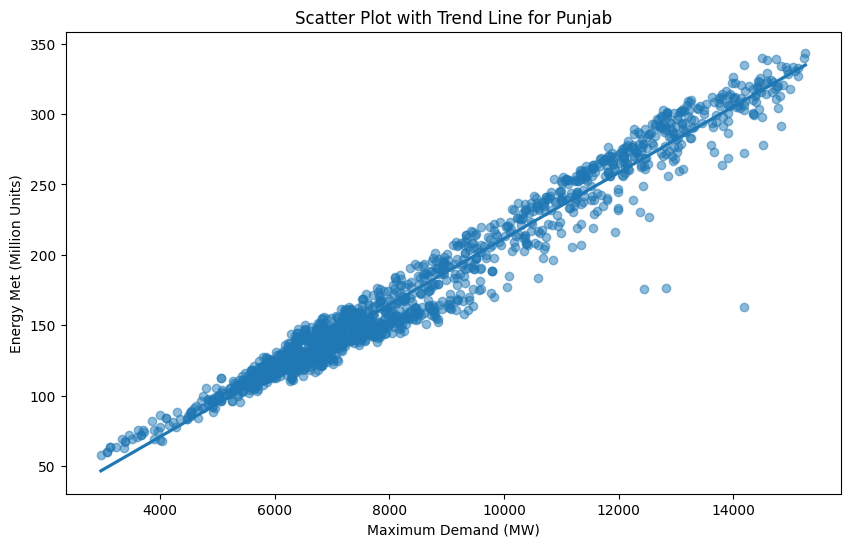

In [25]:
state = 'Punjab'

plt.figure(figsize=(10, 6))
sns.regplot(x=max_demand[state], y=energy_met[state], scatter_kws={'alpha':0.5})
plt.xlabel('Maximum Demand (MW)')
plt.ylabel('Energy Met (Million Units)')
plt.title(f'Scatter Plot with Trend Line for {state}')
plt.show()

**Box Plot:** Compare the distribution of maximum demand and energy met across different states.

Maharashtra and UP have the highest demands.

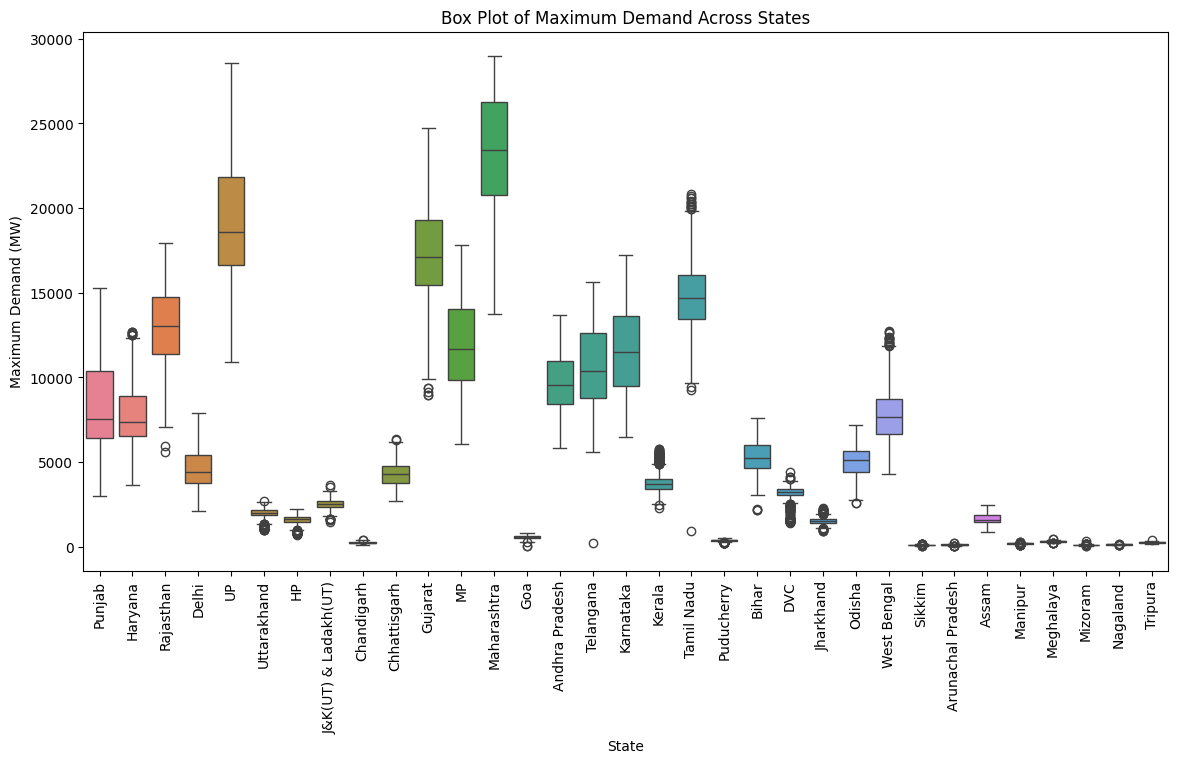

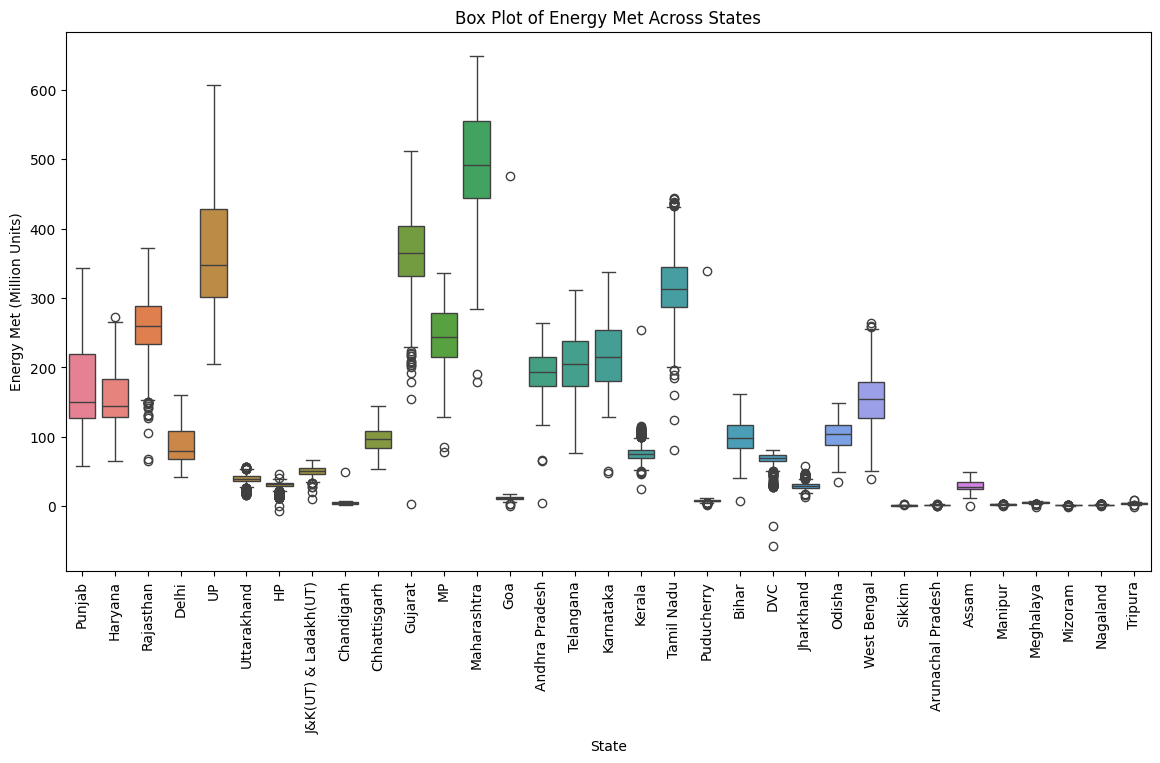

In [26]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=max_demand)
plt.xlabel('State')
plt.ylabel('Maximum Demand (MW)')
plt.title('Box Plot of Maximum Demand Across States')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=energy_met)
plt.xlabel('State')
plt.ylabel('Energy Met (Million Units)')
plt.title('Box Plot of Energy Met Across States')
plt.xticks(rotation=90)
plt.show()

**Comparative plot between different states**

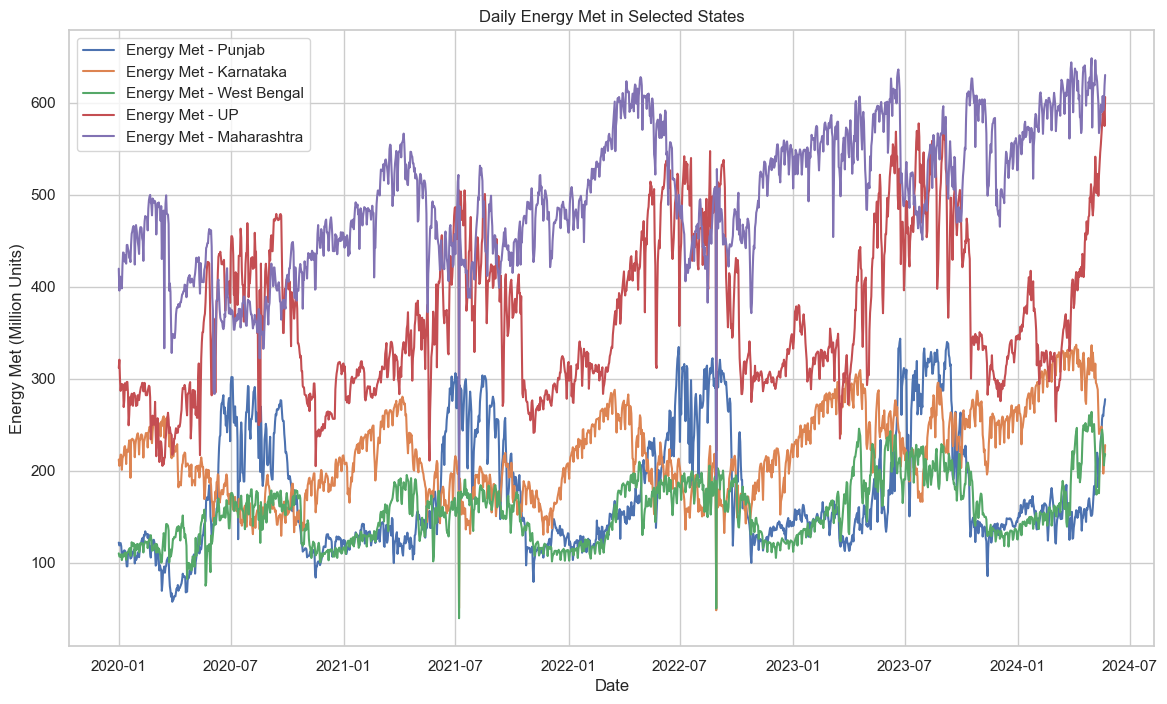

In [27]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select a few states to plot
selected_states = ['Punjab', 'Karnataka', 'West Bengal', 'UP', 'Maharashtra']

# Plot energy met in the selected states
plt.figure(figsize=(14, 8))

for state in selected_states:
    plt.plot(energy_met.index, energy_met[state], label=f'Energy Met - {state}')

plt.title('Daily Energy Met in Selected States')
plt.xlabel('Date')
plt.ylabel('Energy Met (Million Units)')
plt.legend()
plt.show()


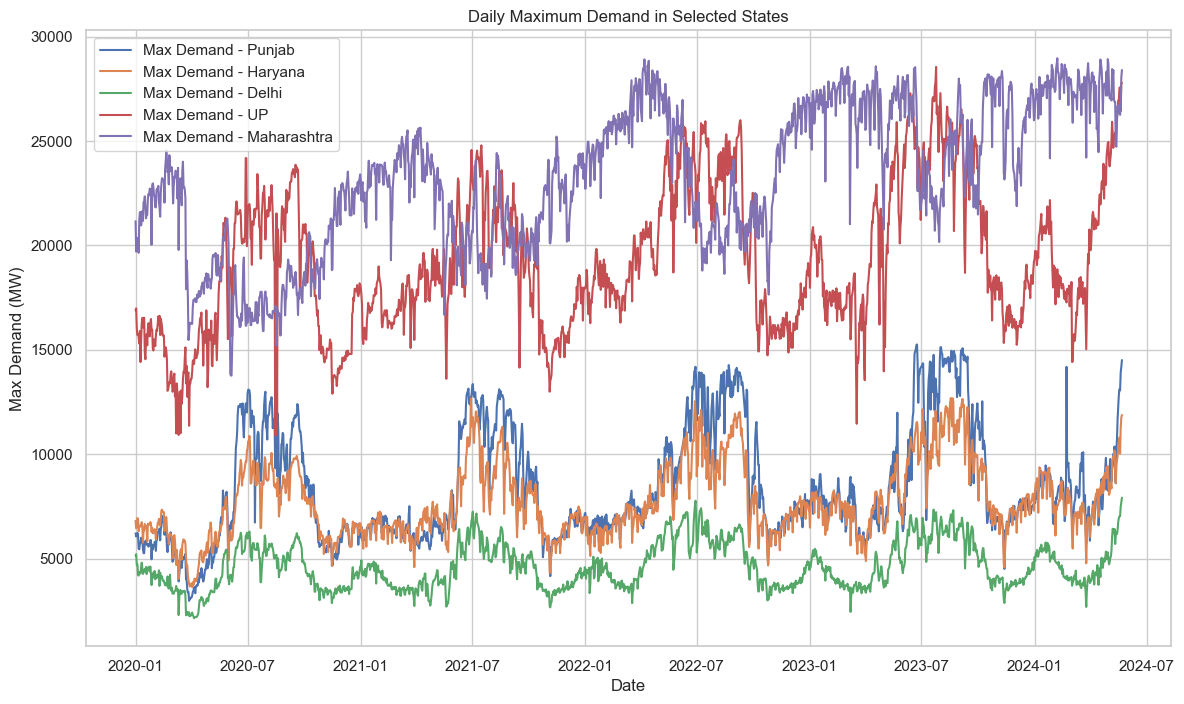

In [28]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select a few states to plot
selected_states = ['Punjab', 'Haryana', 'Delhi', 'UP', 'Maharashtra']

# Plot energy met in the selected states
plt.figure(figsize=(14, 8))

for state in selected_states:
    plt.plot(max_demand.index, max_demand[state], label=f'Max Demand - {state}')

plt.title('Daily Maximum Demand in Selected States')
plt.xlabel('Date')
plt.ylabel('Max Demand (MW)')
plt.legend()
plt.show()


Indicates a seasonal cyclic trend in the data and that the peaks are at different points for different regions in the country

## Time Series Analysis

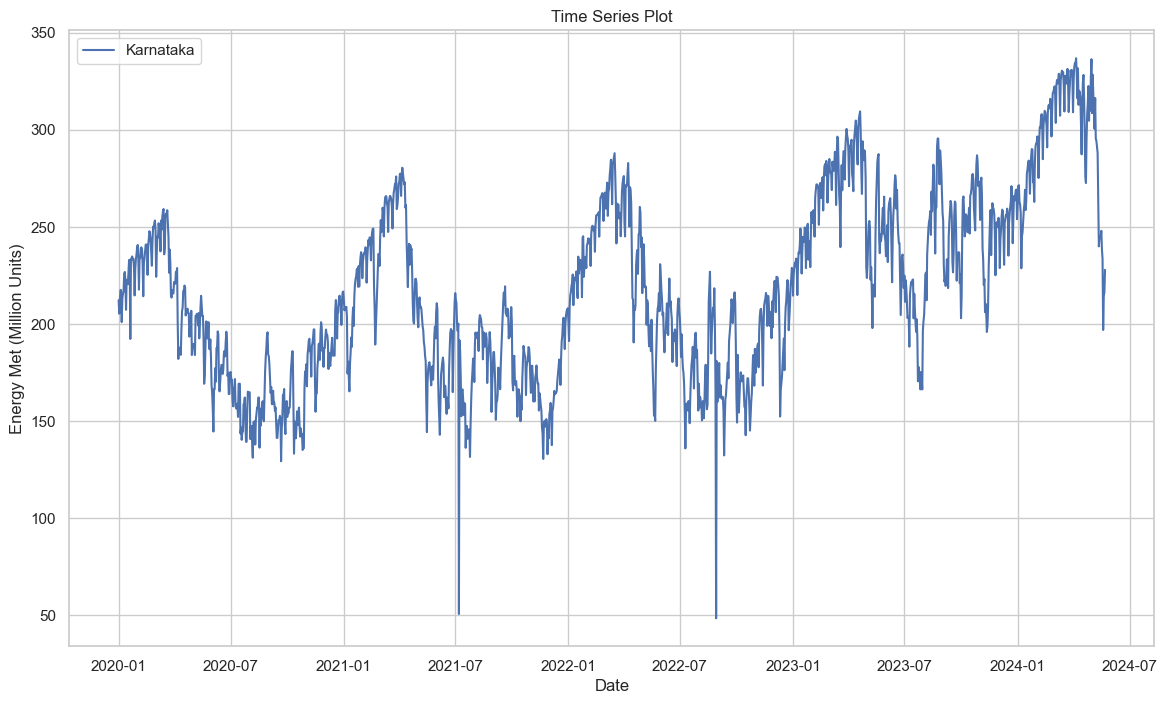

In [29]:
state='Karnataka'
plt.figure(figsize=(14, 8))
plt.plot(energy_met.index, energy_met[state], label=state)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Energy Met (Million Units)')
plt.legend()
plt.show()

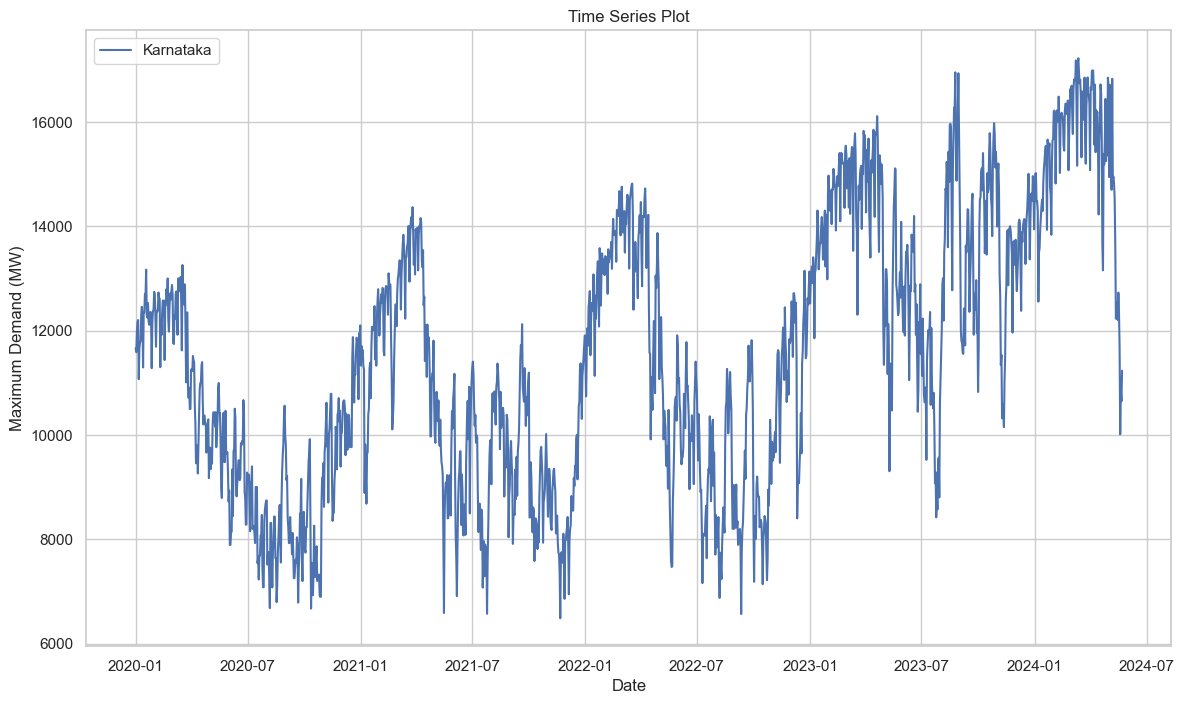

In [30]:
state= 'Karnataka'
plt.figure(figsize=(14, 8))
plt.plot(max_demand.index, max_demand[state], label=state)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Maximum Demand (MW)')
plt.legend()
plt.show()

**Seasonal Decompose**

**Trend Analysis:** Identify long-term movements in the data.

**Seasonal Pattern Detection:** Understand periodic fluctuations and their impact.

**Noise Reduction:** Filter out random noise to better analyze underlying patterns.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for a specific state
state = 'Karnataka'
result = seasonal_decompose(energy_met[state], model='additive', period=365)

plt.figure(figsize=(14, 8))
result.plot()
plt.title(f'Time Series Decomposition of Energy Met in {state}')
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Decompose the time series for a specific state
state = 'Karnataka'
result = seasonal_decompose(max_demand[state], model='additive', period=365)

plt.figure(figsize=(14, 8))
result.plot()
plt.title(f'Time Series Decomposition of Energy Met in {state}')
plt.show()

General upward/increasing trend in data observed

**Rolling Mean and Standard Deviation**: to smooth out short-term fluctuations and highlight longer-term trends or cycles.


In [ ]:
state='Karnataka'

rolling_mean = energy_met[state].rolling(window=30).mean()
rolling_std = energy_met[state].rolling(window=30).std()

plt.figure(figsize=(14, 8))
plt.plot(energy_met.index, energy_met[state], label='Original')
plt.plot(energy_met.index, rolling_mean, label='Rolling Mean')
plt.plot(energy_met.index, rolling_std, label='Rollind Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Energy Met (Million Units)')
plt.legend()
plt.show()

The random dips indicate anomalous data

In [ ]:
state='Karnataka'

rolling_mean = max_demand[state].rolling(window=30).mean()
rolling_std = max_demand[state].rolling(window=30).std()

plt.figure(figsize=(14, 8))
plt.plot(max_demand.index, max_demand[state], label='Original')
plt.plot(max_demand.index, rolling_mean, label='Rolling Mean')
plt.plot(max_demand.index, rolling_std, label='Rollind Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel(' Maximum Demand (MW)')
plt.legend()
plt.show()

**Differencing:** used to make a time series stationary by removing trends and seasonality.

In [ ]:
state='Karnataka'
differenced = energy_met[state].diff()

plt.figure(figsize=(14, 8))
plt.plot(energy_met.index, differenced, label='Differenced')
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Energy Met (Million Units)')
plt.legend()
plt.show()

Anomalous spikes spotted again

**Autocorrelation and Partial Autocorrelation:** to identify the relationships between lagged values and to find order for ARIMA and SARIMA models

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

state='Karnataka'
plt.figure(figsize=(14, 8))
plot_acf(energy_met[state].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14, 8))
plot_pacf(energy_met[state].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

state='Karnataka'
plt.figure(figsize=(14, 8))
plot_acf(max_demand[state].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14, 8))
plot_pacf(max_demand[state].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()

Inferences-


*   Spikes every 8th lag - seasonal pattern with periodicity 8
*   Decay in correlation - indicates trend in data (non-seasonal component)
*   Positive and negative spikes - seasonal pattern might have alternating influences on data.




In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

state='Gujarat'
plt.figure(figsize=(14, 8))
plot_acf(energy_met[state].dropna(), lags=50)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(14, 8))
plot_pacf(energy_met[state].dropna(), lags=50)
plt.title('Partial Autocorrelation Function')
plt.show()

## Modelling

**SARIMA**

Data has seasonal and non-seasonal components, estimating these parameters from the ACF and PACF plots.

p,d,q - non seasonal parameters

P,D,Q,s - seasonal parameters

where-
*   p- autoregressive order
*   q- moving average order
*   d- differencing order
*   s- seasonality


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
state='Karnataka'

# Identify seasonal parameters
seasonal_period = 12

# Select SARIMA orders
p, d, q = 1,1,1
P, D, Q = 1,1,1

# Build SARIMA model
sarima_model = SARIMAX(energy_met[state], order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))

In [ ]:
# Fit model
sarima_result = sarima_model.fit()

Storing the trained SARIMA model as a pickle file for later use

In [ ]:
import joblib

joblib.dump(sarima_result, 'sarima_model.pkl')

In [ ]:
from IPython.display import FileLink

# Provide the file path of the model
file_path = 'sarima_model.pkl'

# Generate a clickable download link
FileLink(file_path)

In [ ]:
from datetime import datetime

state='Karnataka'
data=energy_met[state]

start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)

# Evaluate model
predictions = sarima_result.predict(start=start_date, end=end_date, dynamic=False)
mse = mean_squared_error(data.loc[start_date:end_date], predictions)
mae = mean_absolute_error(data.loc[start_date:end_date], predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (RMSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (RMSE):", mae)

In [ ]:
# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('Actual vs. Predicted - Energy Met')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Forecasting (if desired)
forecast_horizon = 30
forecast = sarima_result.forecast(steps=forecast_horizon)
print("Forecasted values:", forecast)

In [ ]:
state='Karnataka'
data=max_demand[state]

# Identify seasonal parameters
seasonal_period = 12

# Select SARIMA orders
p, d, q = 1,1,1
P, D, Q = 1,1,1

# Build SARIMA model
sarima_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))

# Fit model
sarima_result = sarima_model.fit()


start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)

# Evaluate model
print("===============================================")
predictions = sarima_result.predict(start=start_date, end=end_date, dynamic=False)
mse = mean_squared_error(data.loc[start_date:end_date], predictions)
mae = mean_absolute_error(data.loc[start_date:end_date], predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (RMSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (RMSE):", mae)

# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(data.index, data, label='Actual')
plt.plot(predictions.index, predictions, label='Predicted')
plt.title('Actual vs. Predicted - Maximum Demand')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**Prophet**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df=energy_met
state='Karnataka'

# Prepare the data for Prophet
prophet_df = df.reset_index().rename(columns={'Date': 'ds', state: 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

forecast_horizon=30
# Make a future DataFrame
future = model.make_future_dataframe(periods=forecast_horizon, freq='D')

# Forecast
forecast = model.predict(future)

# Extract actual and predicted values
actual = prophet_df['y'].values[-forecast_horizon:]
predicted = forecast['yhat'].values[-forecast_horizon:]

# Evaluate model
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print("===========================================================")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize results
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted - Energy Met')
plt.show()

In [ ]:
df=max_demand
state='Karnataka'

# Prepare the data for Prophet
prophet_df = df.reset_index().rename(columns={'Date': 'ds', state: 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

forecast_horizon=30
# Make a future DataFrame
future = model.make_future_dataframe(periods=forecast_horizon, freq='D')

# Forecast
forecast = model.predict(future)

# Extract actual and predicted values
actual = prophet_df['y'].values[-forecast_horizon:]
predicted = forecast['yhat'].values[-forecast_horizon:]

# Evaluate model
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print("===========================================================")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize results
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted - Maximum Demand')
plt.show()

SARIMA performs better than Prophet

Predicting future data

In [ ]:
import pandas as pd
from flask import Flask, render_template, request, jsonify
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import xgboost as xgb
import io
import base64
from datetime import datetime, timedelta

app = Flask(__name__)

# Load data
energy_met_df = pd.read_csv('energy_states_consolidated.csv')
max_demand_df = pd.read_csv('max_states_consolidated.csv')

# Convert 'Date' columns
energy_met_df['Date'] = pd.to_datetime(energy_met_df['Date'], format='%d-%m-%y')
max_demand_df['Date'] = pd.to_datetime(max_demand_df['Date'], format='%d-%m-%y')

# Set Date as index
energy_met_df.set_index('Date', inplace=True)
max_demand_df.set_index('Date', inplace=True)

# Sort and fill missing
energy_met_df.sort_index(inplace=True)
max_demand_df.sort_index(inplace=True)
energy_met_df.ffill(inplace=True)
max_demand_df.ffill(inplace=True)

# Transpose for dropdown state list
energy_met_trans = energy_met_df.T
max_demand_trans = max_demand_df.T


@app.route('/')
def index():
    states = energy_met_trans.index.unique()
    return render_template('old.html', states=states)


@app.route('/forecast', methods=['POST'])
def forecast():
    state = request.form['state']
    data_type = request.form['data_type']
    model_type = request.form['model_type']
    end_date_str = request.form['end_date']
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d").date()

    if data_type == 'energy_met':
        df = pd.DataFrame(energy_met_df[state].dropna())
        unit = 'MU'
    else:
        df = pd.DataFrame(max_demand_df[state].dropna())
        unit = 'MW'

    df = df.asfreq('D')
    df[state].interpolate(method='time', inplace=True)

    last_date = df.index.max().date()
    forecast_days = (end_date - last_date).days

    plt.figure(figsize=(10, 6))
    yval = df[state].min()

    if forecast_days > 0:
        if model_type == 'prophet':
            # Prophet
            prophet_df = df.reset_index().rename(columns={'Date': 'ds', state: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
            model = Prophet()
            model.fit(prophet_df)
            future = model.make_future_dataframe(periods=forecast_days, freq='D')
            forecast = model.predict(future)
            forecast['ds'] = forecast['ds'].dt.date
            future_val_row = forecast[forecast['ds'] == end_date]
            if future_val_row.empty:
                return jsonify({'error': 'Forecast date out of range'}), 400
            future_val = future_val_row['yhat'].values[0]

            # Plot
            plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual')
            plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
            plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

        elif model_type == 'sarima':
            # SARIMA
            model = SARIMAX(df[state], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
            results = model.fit(disp=False)
            forecast = results.get_forecast(steps=forecast_days)
            pred_index = pd.date_range(start=last_date + timedelta(days=1), periods=forecast_days)
            forecast_mean = forecast.predicted_mean
            future_val = forecast_mean[-1]

            # Plot
            plt.plot(df.index, df[state], label='Actual')
            plt.plot(pred_index, forecast_mean, label='Forecast', color='orange')
            conf_int = forecast.conf_int()
            plt.fill_between(pred_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2)

        elif model_type == 'xgboost':
            # XGBoost
            df = df.reset_index()
            df['day'] = df['Date'].dt.day
            df['month'] = df['Date'].dt.month
            df['year'] = df['Date'].dt.year

            X = df[['day', 'month', 'year']]
            y = df[state]

            model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
            model.fit(X, y)

            # Generate future dates
            future_dates = pd.date_range(start=last_date + timedelta(days=1), end=end_date)
            future_df = pd.DataFrame({
                'day': future_dates.day,
                'month': future_dates.month,
                'year': future_dates.year
            })

            predictions = model.predict(future_df)
            future_val = predictions[-1]

            # Plot
            plt.plot(df['Date'], y, label='Actual')
            plt.plot(future_dates, predictions, label='Forecast', color='orange')

        else:
            return jsonify({'error': 'Invalid model selected'}), 400

        # Labeling
        formatted_date = end_date.strftime('%d %B %Y')
        plt.text(df.index[-60], yval, f'{formatted_date} - {future_val:.2f} {unit}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'{data_type.replace("_", " ").title()} Forecast for {state}')
        plt.xticks(rotation=45)
        plt.legend()

    else:
        # Historical data point
        df.index = pd.to_datetime(df.index)
        val = df.loc[end_date_str, state]
        plt.plot(df.index, df[state])
        formatted_date = end_date.strftime('%d %B %Y')
        plt.text(df.index[-60], yval, f'{formatted_date} - {val:.2f} {unit}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title(f'{data_type.replace("_", " ").title()} Data for {state}')
        plt.xticks(rotation=45)
        plt.legend()
        future_val = val

    # Output the plot
    img = io.BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()

    return jsonify({'plot_url': plot_url})
if __name__ == '__main__':
    import os
    app.run(debug=True, use_reloader=False)  # Prevents the SystemExit

